In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Salary_dataset.csv")
df = df.drop(columns=[df.columns[0]])
print(df)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


In [32]:
X = df["YearsExperience"].to_numpy()
Y = df["Salary"].to_numpy()

# Chia dữ liệu thành 70% train và 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"Data train: {X_train}")
print(f"Data test:  {X_test}")

Data train: [ 1.2  2.3  5.2  3.   4.2  4.1  8.   1.4  1.6  9.1  2.1  7.2  9.6  6.
 10.6  6.9  3.3  4.   4.6  6.1  3.1]
Data test:  [ 9.7  5.   8.3  5.4  3.3  3.8 10.4  8.8  4.1]


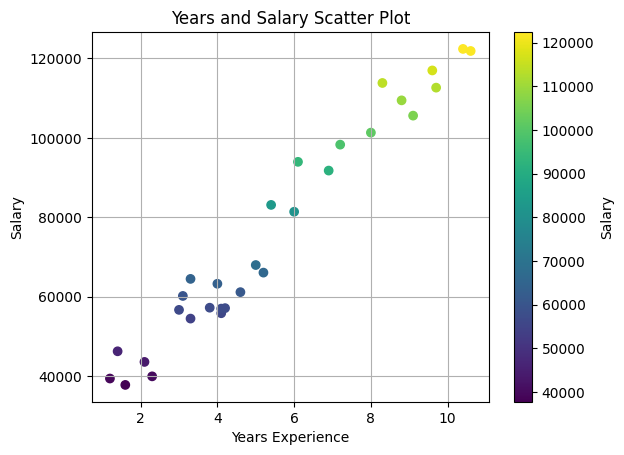

In [33]:
plt.scatter(X,Y, c=Y, cmap='viridis')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

**Cài đặt thủ công**

chọn w,b ban đầu

In [34]:
w_manual = np.random.randn()
b_manual = np.random.randn()
alpha = 0.0001 #tốc độ học
print(f'random initial w = {w_manual}\nrandom initial b = {b_manual}')

random initial w = 1.6046710214786783
random initial b = 0.5427360609056634


tính f(w,b) = wx + b

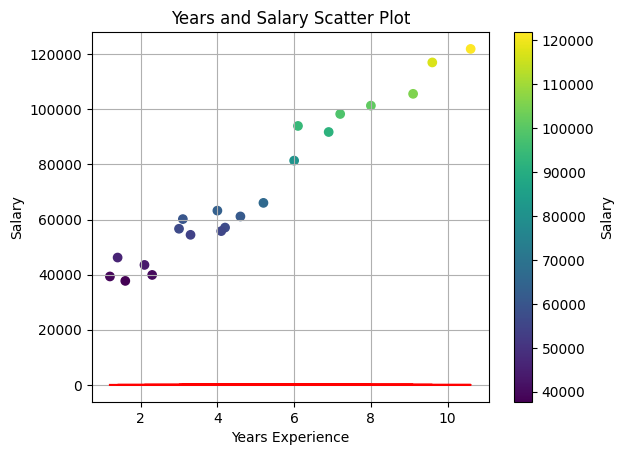

In [35]:
def line(w, b, x_values):
    y_values = []
    for x_value in x_values:
        y_value = w * x_value + b
        y_values.append(y_value)
    return y_values

init_salary_guess = line(w_manual, b_manual, X_train)

plt.scatter(X_train,y_train, c=y_train, cmap='viridis')
plt.plot(X_train, init_salary_guess, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

hàm tổn thất

In [36]:
def cost(w, b, x, y):
    m = len(x)
    _cost = 0

    for i, x_value in enumerate(x):
        y_value = y[i]
        y_guess = w * x_value + b
        _cost += (y_guess - y_value)**2
    return (_cost / (2*m))

print(cost(w_manual, b_manual, X_train, y_train))

2863813319.111718


Đạo hàm J(w,b) => w, b

In [37]:
def derivatives(w, b, x, y):
    m = len(x)
    der_w = 0
    der_b = 0

    for i, x_value in enumerate(x):
        y_value = y[i]
        der_w += (w * x_value + b - y_value) * x_value
        der_b += (w * x_value + b - y_value)
    
    return der_w/m, der_b/m

Tìm w, b tối ưu

In [38]:
def Gradient_descent( w,b, alpha, x, y, epoch = 100000):
    count = 1
    while True:
        der_w, der_b = derivatives(w, b, x, y)
        w = w - alpha * der_w
        b = b - alpha * der_b
        _cost = cost(w, b, x, y)
        print(f'Iteration # {count}, cost = {_cost}')

        if _cost < 1000000 or count == epoch:
            print(f'Breaking the loop. Cost = {_cost}, step = {count}\n\nw = {w}\nb = {b}')
            return w, b
        count+=1

In [39]:
w_manual_final , b_manual_final = Gradient_descent(w_manual,b_manual,alpha, X_train,y_train,2000)

Iteration # 1, cost = 2845682030.6911736
Iteration # 2, cost = 2827668642.0598364
Iteration # 3, cost = 2809772386.44902
Iteration # 4, cost = 2791992502.076771
Iteration # 5, cost = 2774328232.115437
Iteration # 6, cost = 2756778824.659448
Iteration # 7, cost = 2739343532.6933064
Iteration # 8, cost = 2722021614.0597777
Iteration # 9, cost = 2704812331.428303
Iteration # 10, cost = 2687714952.2636013
Iteration # 11, cost = 2670728748.794488
Iteration # 12, cost = 2653852997.982889
Iteration # 13, cost = 2637086981.493058
Iteration # 14, cost = 2620429985.660995
Iteration # 15, cost = 2603881301.464066
Iteration # 16, cost = 2587440224.4908133
Iteration # 17, cost = 2571106054.9109683
Iteration # 18, cost = 2554878097.445658
Iteration # 19, cost = 2538755661.3378057
Iteration # 20, cost = 2522738060.322718
Iteration # 21, cost = 2506824612.598876
Iteration # 22, cost = 2491014640.798901
Iteration # 23, cost = 2475307471.960724
Iteration # 24, cost = 2459702437.4989266
Iteration # 25, c

[126701.39013907521, 66785.88924144505, 108854.21965893004, 71885.08080720081, 45114.32508698307, 51488.31454417777, 135624.9753791478, 115228.20911612475, 55312.70821849459]


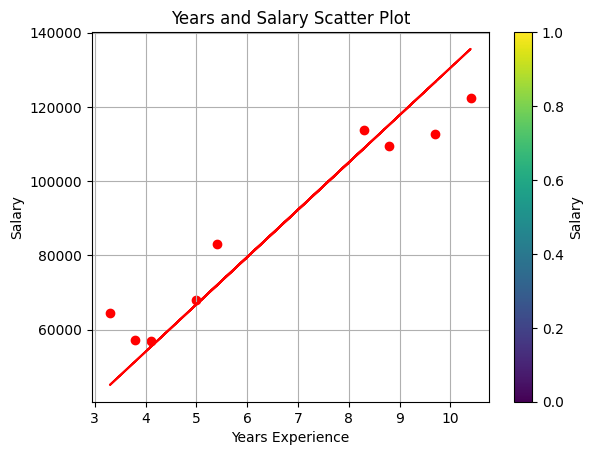

In [41]:
ml_salary = []
for year in X_test:
    ml_salary.append(w_manual_final * year + b_manual_final)

print(ml_salary)

# plt.scatter(X_train,y_train, c=y_train, cmap='viridis')
plt.scatter(X_test,y_test, color = "red")
plt.plot(X_test, ml_salary, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

Sklearn

In [ ]:
df = pd.read_csv("Salary_dataset.csv")
df = df.drop(columns=[df.columns[0]])
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
X = df["YearsExperience"]
Y = df["Salary"]
np.corrcoef(X,Y)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [ ]:
# Chia dữ liệu thành 70% train và 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"Data train: {X_train}")
print(f"Data test:  {X_test}")

Data train: 0      1.2
4      2.3
16     5.2
5      3.0
13     4.2
11     4.1
22     8.0
1      1.4
2      1.6
25     9.1
3      2.1
21     7.2
26     9.6
18     6.0
29    10.6
20     6.9
7      3.3
10     4.0
14     4.6
19     6.1
6      3.1
Name: YearsExperience, dtype: float64
Data test:  27     9.7
15     5.0
23     8.3
17     5.4
8      3.3
9      3.8
28    10.4
24     8.8
12     4.1
Name: YearsExperience, dtype: float64


In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [ ]:
## Hiển thị kết quả các tham số:
w0 = model.intercept_
w1 = model.coef_[0]
print('Intercept w_0 =', model.intercept_)
print('          w_i =', model.coef_)


Intercept w_0 = [24985.53016251]
          w_i = [[9339.08172382]]


[array([115574.62288352]), array([71680.93878159]), array([102499.90847018]), array([75416.57147111]), array([55804.4998511]), array([60474.04071301]), array([122111.98009019]), array([107169.44933209]), array([63275.76523015])]


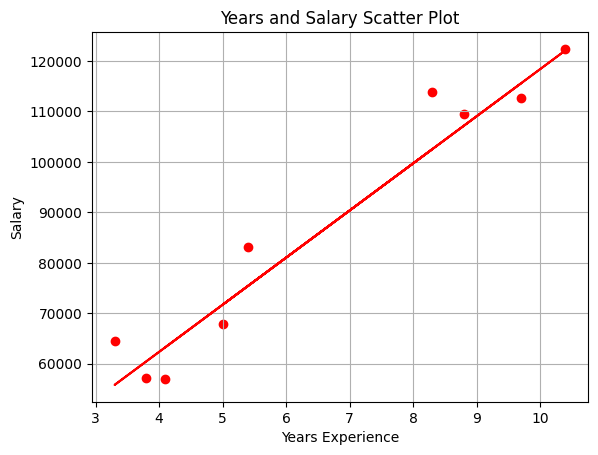

In [42]:
ml_salary = []
for yearEx in X_test:
    ml_salary.append(w1 * yearEx + w0)

print(ml_salary)

# plt.scatter(X_train,y_train, c=y_train, cmap='viridis')
plt.scatter(X_test,y_test, color = "red")
plt.plot(X_test, ml_salary, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.grid(True)